In [ ]:
#Import all necessary libraries
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

#Selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Evaluation Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error, mean_absolute_error, r2_score


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/IoTID20.csv')
data.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0,0,75.0,0.000000,75,75,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0,0,2655.0,2261.327486,4254,1056,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/7/2019 1:24,141,0,3,...,0.0,0,0,70.5,0.707107,71,70,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,4/9/2019 3:58,151,0,2,...,0.0,0,0,151.0,0.000000,151,151,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/9/2019 1:41,153,2,1,...,0.0,0,0,76.5,0.707107,77,76,Anomaly,Mirai,Mirai-Hostbruteforceg


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  int64  
 11  TotLen_Bwd_Pkts    625783 non-null  int64  
 12  Fwd_Pkt_Len_Max    625783 non-null  int64  
 13  Fwd_Pkt_Len_Min    625783 non-null  int64  
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

In [ ]:
data.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.00000,625783.000000,625783.000000,625783.000000,625783.000000,...,625783.000000,625783.0,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000
mean,35026.156190,16387.027479,9.971436,635.422865,1.675566,1.46853,570.738980,929.280973,392.489726,348.126571,...,1.509913,0.0,3.764405,0.353385,4.248735,3.462159,502.503832,52.403995,561.540512,467.264459
std,24721.047752,17550.363037,5.379857,3496.740723,4.309970,1.21949,1161.873195,1731.760875,619.575865,588.161845,...,4.332737,0.0,68.064508,20.723370,88.934148,64.111043,2112.957360,1153.184897,2866.497606,1931.909971
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9020.000000,8899.000000,6.000000,76.000000,0.000000,1.00000,0.000000,18.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,74.000000,71.000000
50%,51991.000000,9020.000000,6.000000,132.000000,1.000000,1.00000,32.000000,104.000000,30.000000,30.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,93.500000,0.000000,114.000000,78.000000
75%,56361.000000,10101.000000,17.000000,221.000000,2.000000,2.00000,1388.000000,1441.000000,1388.000000,386.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,141.000000,1.527525,154.000000,130.000000
max,65500.000000,65371.000000,17.000000,99984.000000,186.000000,560.00000,109846.000000,773284.000000,1464.000000,1464.000000,...,186.000000,0.0,9044.625000,8598.658250,26785.000000,6659.000000,99973.000000,67071.906620,99973.000000,99973.000000


In [ ]:
data.shape

(625783, 86)

In [ ]:
data.drop(['Flow_ID','Src_IP','Src_Port','Dst_IP','Dst_Port','Protocol','Timestamp','Flow_Byts/s','Flow_Pkts/s'], axis = 1, inplace = True)

In [ ]:
data.isnull().sum()

Flow_Duration      0
Tot_Fwd_Pkts       0
Tot_Bwd_Pkts       0
TotLen_Fwd_Pkts    0
TotLen_Bwd_Pkts    0
                  ..
Idle_Max           0
Idle_Min           0
Label              0
Cat                0
Sub_Cat            0
Length: 77, dtype: int64

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data['Cat'].count

<bound method Series.count of 0          Mirai
1            DoS
2           Scan
3          Mirai
4          Mirai
           ...  
625753     Mirai
625769     Mirai
625772     Mirai
625778     Mirai
625781    Normal
Name: Cat, Length: 194250, dtype: object>

In [ ]:
data['Label'].count

<bound method Series.count of 0         Anomaly
1         Anomaly
2         Anomaly
3         Anomaly
4         Anomaly
           ...   
625753    Anomaly
625769    Anomaly
625772    Anomaly
625778    Anomaly
625781     Normal
Name: Label, Length: 194250, dtype: object>

In [ ]:
data.nunique()

Flow_Duration      12670
Tot_Fwd_Pkts         116
Tot_Bwd_Pkts          42
TotLen_Fwd_Pkts     2479
TotLen_Bwd_Pkts     2612
                   ...  
Idle_Max           11956
Idle_Min           10872
Label                  2
Cat                    5
Sub_Cat                9
Length: 77, dtype: int64

# **Descriptive Analytics**

# **Numaric**

# Meaures of Central Tendency

In [ ]:
#mean

print('mean:')
print(data['Flow_Duration'].mean())

mean:
1139.1954903474902


In [ ]:
#median

print('median:')
print(data['Flow_Duration'].median)

median:
<bound method NDFrame._add_numeric_operations.<locals>.median of 0           75
1         5310
2          141
3          151
4          153
          ... 
625753     153
625769     236
625772      28
625778     277
625781     240
Name: Flow_Duration, Length: 194250, dtype: int64>


In [ ]:
data['Flow_Duration'].agg(['mean', 'median', lambda x: x.mode()[0]])   # calculate all measures (mean, median, mod) by using lambda

mean        1139.19549
median       154.00000
<lambda>      74.00000
Name: Flow_Duration, dtype: float64

# Measures of Dispersion

In [ ]:
#range

print('Range:')   #Range -> max - min
print(data['Flow_Duration'].max() - data['Flow_Duration'].min())

Range:
99984


In [ ]:
#variance
print('variance:')
print(data['Flow_Duration'].var())

variance:
36131039.25014003


In [ ]:
#Quartile

print('IQR:')
Q1 = data['Flow_Duration'].quantile(0.25)
Q3 = data['Flow_Duration'].quantile(0.75)

IQR = Q3 - Q1
IQR

IQR:


197.0

In [ ]:
#Coefficient of Varaince

print('Coefficient')
print(data['Flow_Duration'].std()/data['Flow_Duration'].mean(), '%')

Coefficient
5.276451732297708 %


# Measures of Position

In [ ]:
#Precentile : precentage

percentile_10 = data['Flow_Duration'].quantile(0.1)
percentile_10

40.0

In [ ]:
percentile_60 = data['Flow_Duration'].quantile(0.6)
percentile_60

198.0

In [ ]:
percentile_90 = data['Flow_Duration'].quantile(0.9)
percentile_90

903.0

In [ ]:
#Quartile : quarter

data['Flow_Duration'].quantile(0.25)

84.0

In [ ]:
data['Flow_Duration'].quantile(0.50)

154.0

In [ ]:
data['Flow_Duration'].quantile(0.75)

281.0

In [ ]:
#Decile : decimal
decile_perecentages = range(0, 100, 10)
decile_values = data['Flow_Duration'].quantile([p/100 for p in decile_perecentages])

print('Deciles Follow_Duration values:', decile_values)

Deciles Follow_Duration values: 0.0      0.0
0.1     40.0
0.2     76.0
0.3    115.0
0.4    142.0
0.5    154.0
0.6    198.0
0.7    259.0
0.8    333.0
0.9    903.0
Name: Flow_Duration, dtype: float64


In [ ]:
# Z-score : (x - mean) / std (standerd deviation)
mean = data['Flow_Duration'].mean()
std = data['Flow_Duration'].std()
data['Z-score'] = (data['Flow_Duration'] - mean) / std
data['Z-score']
data.head()

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat,Z-score
0,75,1,1,982,1430,982,982,982.0,0.000000,1430,...,0,0,75.0,0.000000,75,75,Anomaly,Mirai,Mirai-Ackflooding,-0.177044
1,5310,1,2,0,0,0,0,0.0,0.000000,0,...,0,0,2655.0,2261.327486,4254,1056,Anomaly,DoS,DoS-Synflooding,0.693872
2,141,0,3,0,2806,0,0,0.0,0.000000,1388,...,0,0,70.5,0.707107,71,70,Anomaly,Scan,Scan Port OS,-0.166064
3,151,0,2,0,2776,0,0,0.0,0.000000,1388,...,0,0,151.0,0.000000,151,151,Anomaly,Mirai,Mirai-Hostbruteforceg,-0.164400
4,153,2,1,886,420,452,434,443.0,12.727922,420,...,0,0,76.5,0.707107,77,76,Anomaly,Mirai,Mirai-Hostbruteforceg,-0.164068


# Outlier

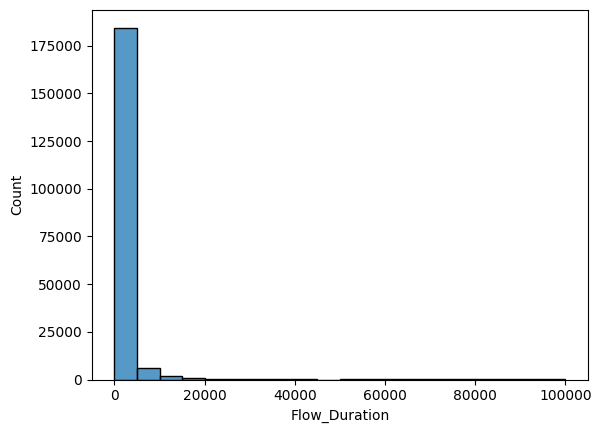

In [ ]:
# histogram

sns.histplot(data['Flow_Duration'],bins= 20)
plt.show()

In [ ]:
mean = data['Flow_Duration'].mean()
std = data['Flow_Duration'].std()
data['Z-score'] = (data['Flow_Duration'] - mean) / std
data['Z-score']

0        -0.177044
1         0.693872
2        -0.166064
3        -0.164400
4        -0.164068
            ...   
625753   -0.164068
625769   -0.150259
625772   -0.184863
625778   -0.143438
625781   -0.149594
Name: Z-score, Length: 194250, dtype: float64

In [ ]:
q1 = data['Flow_Duration'].quantile(0.25)
q3 = data['Flow_Duration'].quantile(0.75)
IQR = q3 - q1

data[((data['Flow_Duration'] < q1 - 1.5 * IQR)) | (data['Flow_Duration'] > (q3 + 1.5 * IQR))]

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat,Z-score
1,5310,1,2,0,0,0,0,0.0,0.000000,0,...,0,0,2655.000000,2261.327486,4254,1056,Anomaly,DoS,DoS-Synflooding,0.693872
9,6799,0,2,0,0,0,0,0.0,0.000000,0,...,0,0,6799.000000,0.000000,6799,6799,Anomaly,DoS,DoS-Synflooding,0.941589
15,60431,5,7,5680,1097,1388,1041,1136.0,144.461067,1097,...,898,121,9708.333333,16525.220150,43394,1394,Anomaly,DoS,DoS-Synflooding,9.864031
38,4125,5,2,0,0,0,0,0.0,0.000000,0,...,1803,1803,2322.000000,0.000000,2322,2322,Anomaly,DoS,DoS-Synflooding,0.496731
67,13406,0,2,0,0,0,0,0.0,0.000000,0,...,0,0,13406.000000,0.000000,13406,13406,Anomaly,DoS,DoS-Synflooding,2.040757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625533,2811,0,2,0,0,0,0,0.0,0.000000,0,...,0,0,2811.000000,0.000000,2811,2811,Anomaly,DoS,DoS-Synflooding,0.278128
625575,6860,0,2,0,0,0,0,0.0,0.000000,0,...,0,0,6860.000000,0.000000,6860,6860,Anomaly,DoS,DoS-Synflooding,0.951737
625647,89234,8,9,280,4601,40,20,35.0,9.258201,1065,...,899,401,8538.100000,11516.658550,30802,1077,Anomaly,DoS,DoS-Synflooding,14.655818
625707,6065,0,2,0,0,0,0,0.0,0.000000,0,...,0,0,6065.000000,0.000000,6065,6065,Anomaly,DoS,DoS-Synflooding,0.819477


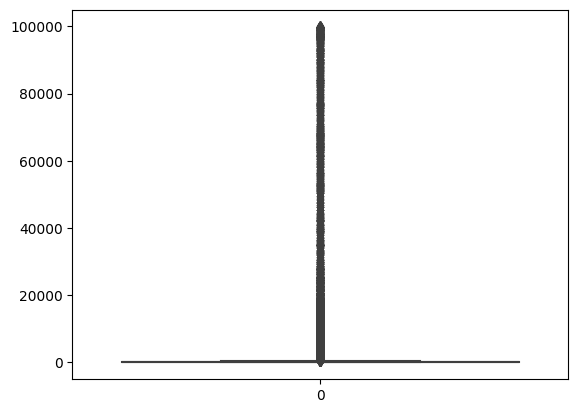

In [ ]:
# box plot

sns.boxplot(data['Flow_Duration'])
plt.show()

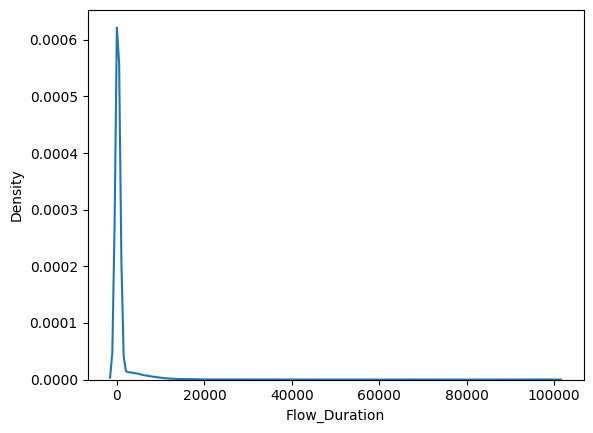

In [ ]:
sns.kdeplot(data['Flow_Duration'])
plt.show()

# **Categorical**

## Measures of Frequancy

In [ ]:
#Frequancy
print('Frequancy')
print(data['Sub_Cat'].value_counts())

Frequancy
Mirai-UDP Flooding       60749
Mirai-Hostbruteforceg    33859
Normal                   26801
DoS-Synflooding          20192
Mirai-Ackflooding        14551
Mirai-HTTP Flooding      14414
MITM ARP Spoofing        10186
Scan Port OS              8649
Scan Hostport             4849
Name: Sub_Cat, dtype: int64


In [ ]:
#Relative Frequancy
print('Relative Frecquancy')
print(data['Sub_Cat'].value_counts(normalize = True))

Relative Frecquancy
Mirai-UDP Flooding       0.312736
Mirai-Hostbruteforceg    0.174306
Normal                   0.137972
DoS-Synflooding          0.103949
Mirai-Ackflooding        0.074909
Mirai-HTTP Flooding      0.074203
MITM ARP Spoofing        0.052438
Scan Port OS             0.044525
Scan Hostport            0.024963
Name: Sub_Cat, dtype: float64


In [ ]:
#Commulative Frecquancy
print('Commulative Frecquancy')
print(data['Sub_Cat'].value_counts().cumsum())

Commulative Frecquancy
Mirai-UDP Flooding        60749
Mirai-Hostbruteforceg     94608
Normal                   121409
DoS-Synflooding          141601
Mirai-Ackflooding        156152
Mirai-HTTP Flooding      170566
MITM ARP Spoofing        180752
Scan Port OS             189401
Scan Hostport            194250
Name: Sub_Cat, dtype: int64


In [ ]:
#Relative Commulative Frequancy
print('Relative Commulative Frequancy')
print(data['Sub_Cat'].value_counts(normalize = True).cumsum())

Relative Commulative Frequancy
Mirai-UDP Flooding       0.312736
Mirai-Hostbruteforceg    0.487042
Normal                   0.625014
DoS-Synflooding          0.728963
Mirai-Ackflooding        0.803871
Mirai-HTTP Flooding      0.878075
MITM ARP Spoofing        0.930512
Scan Port OS             0.975037
Scan Hostport            1.000000
Name: Sub_Cat, dtype: float64


## Measures of central tendency

In [ ]:
#mode
data['Cat'].mode()[0]

'Mirai'

## Choose one of the targets: label, cat, sub cat

### Plots for selected target with other columns (bar, boxplot ... etc.)

## Pie chart for selected target

In [ ]:
data['Label'].shape

(194250,)

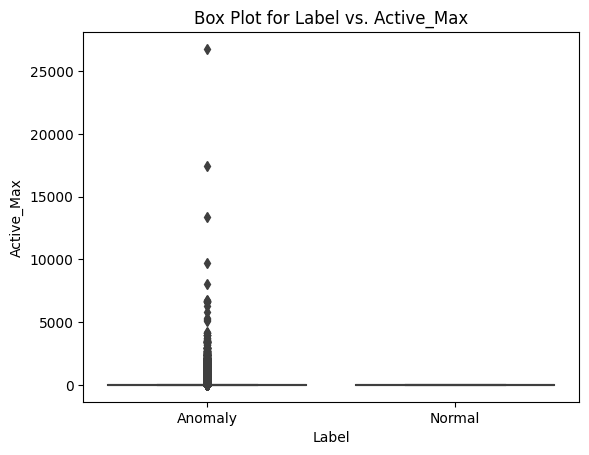

In [ ]:
#create a box plot

sns.boxplot(data, x='Label', y='Active_Max')

plt.title('Box Plot for Label vs. Active_Max')

plt.show()

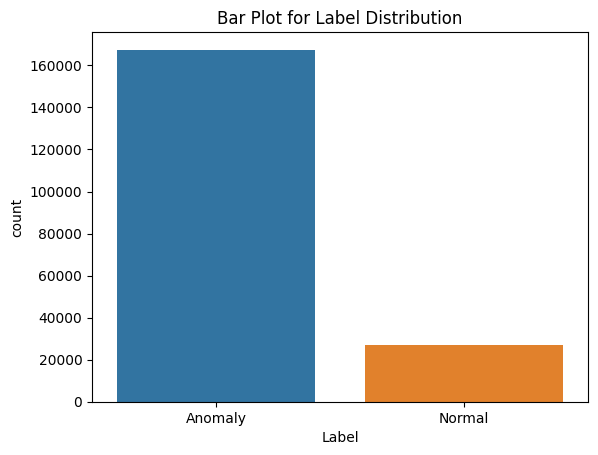

In [ ]:
#create a bar plot

sns.countplot(data, x='Label')

plt.title('Bar Plot for Label Distribution')

plt.show()

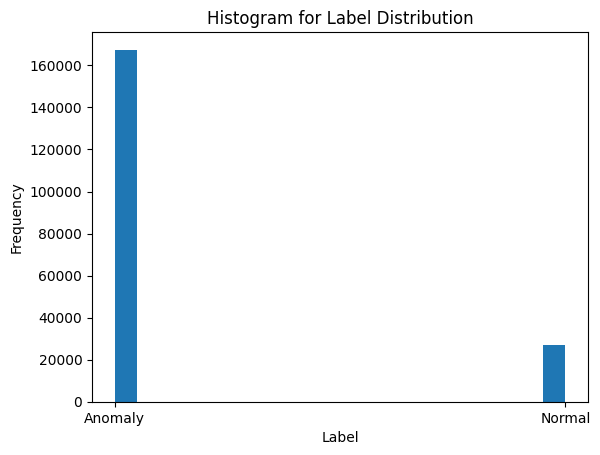

In [ ]:
#create histogram

df = pd.DataFrame(data)

plt.hist(data['Label'], bins= 20)

plt.title('Histogram for Label Distribution')

plt.xlabel('Label')

plt.ylabel('Frequency')

plt.show()

# **Predictive Analytics**

# **Prepare the Data**

## Check nulls in the dataset and drop or fill it

In [ ]:
data.isnull().sum()

Flow_Duration      0
Tot_Fwd_Pkts       0
Tot_Bwd_Pkts       0
TotLen_Fwd_Pkts    0
TotLen_Bwd_Pkts    0
                  ..
Idle_Min           0
Label              0
Cat                0
Sub_Cat            0
Z-score            0
Length: 78, dtype: int64

In [ ]:
data.dropna(inplace = True)

## Convert all categorical to numeric

In [ ]:
from sklearn.preprocessing import LabelEncoder


cat_columns = data.select_dtypes(['object']).columns


#convert all categorical variables to numeric


label_encoder = LabelEncoder()


data[cat_columns] = data[cat_columns].apply(LabelEncoder().fit_transform)

## Choose a target from the following columns: Label, Cat, and Sub_Cat, and drop the others.

In [ ]:
# 'Label' is the Target column here

from sklearn.model_selection import train_test_split

y = data['Label']

X = data.drop(['Label'],axis = 1)

# Split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.20 ,random_state=0)


## Apply any classification model on the given data set.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# instantiate the feature selection model
selector = SelectKBest(f_regression, k=3)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
# KNeighbors

model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:
# Calculate metrics for KNN

acc_knn = accuracy_score(y_test, y_pred)
rec_knn = recall_score(y_test, y_pred, average='weighted')
prec_knn = precision_score(y_test, y_pred, average='weighted')
f1_knn = f1_score(y_test, y_pred, average='weighted')

# printing accuracy
print("Accuracy: ", acc_knn)

# printing recall
print("Recall: ", rec_knn)

# printing precision
print("Precision: ", prec_knn)

# printing f1 score
print("F1_score: ", f1_knn)

Accuracy:  0.9987902187902188
Recall:  0.9987902187902188
Precision:  0.9987901266364476
F1_score:  0.9987901713245071


In [ ]:
# Gaussian NB

model = GaussianNB()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:
# Calculate metrics for NB

acc_NB = accuracy_score(y_test, y_pred)
rec_NB = recall_score(y_test, y_pred, average='weighted')
prec_NB = precision_score(y_test, y_pred, average='weighted')
f1_NB = f1_score(y_test, y_pred, average='weighted')

# printing accuracy
print("Accuracy: ", acc_NB)

# printing recall
print("Recall: ", rec_NB)

# printing precision
print("Precision: ", prec_NB)

# printing f1 score
print("F1_score: ", f1_knn)


Accuracy:  0.9998970398970399
Recall:  0.9998970398970399
Precision:  0.9998970521907835
F1_score:  0.9987901713245071


In [ ]:
# Decision Tree

model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:
# Calculate metrics for DT

acc_DT = accuracy_score(y_test, y_pred)
rec_DT = recall_score(y_test, y_pred, average='weighted')
prec_DT = precision_score(y_test, y_pred, average='weighted')
f1_DT = f1_score(y_test, y_pred, average='weighted')

# printing accuracy
print("Accuracy: ", acc_DT)

# printing recall
print("Recall: ", rec_DT)

# printing precision
print("Precision: ", prec_DT)

# printing f1 score
print("F1_score: ", f1_DT)


Accuracy:  1.0
Recall:  1.0
Precision:  1.0
F1_score:  1.0


In [ ]:
# create a Table for show the accuracy , Precsion , Recall , F1-score
# (Comparision Table)


#pd.DataFrame({'Accuracy':[acc_knn, acc_DT, acc_NB],
                 #'Precision':[prec_knn, prec_DT, prec_NB],
                 #'Recall':[rec_knn, rec_DT, rec_NB],
                 #'F1_score':[f1_knn, f1_DT, f1_NB]},
                  #index = ['KNN', 'DT', 'NB'])


In [ ]:
# create a Table for show the accuracy , Precsion , Recall , F1-score
# (Comparision Table)

list_of_models = [DecisionTreeClassifier(),
                  KNeighborsClassifier(),
                  GaussianNB()]

index = ["accuracy", "precision", "recall", "f1"]

df_model = pd.DataFrame(index=index)

for i in list_of_models:

    model = i

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred, average='micro')
    recall = recall_score(y_test,y_pred, average='micro')
    f1 = f1_score(y_test,y_pred, average='micro')

    print("\tThe Models is " + str(i))
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:  {recall:.4f}")
    print(f"F1_score: {f1:.4f}")
    print("#"*50 +"\n")

    df_model[str(i).rstrip("()")]= [accuracy, precision, recall, f1]

df_model.T

	The Models is DecisionTreeClassifier()
Accuracy:  1.0000
Precision: 1.0000
Recall:  1.0000
F1_score: 1.0000
##################################################

	The Models is KNeighborsClassifier()
Accuracy:  0.9834
Precision: 0.9834
Recall:  0.9834
F1_score: 0.9834
##################################################

	The Models is GaussianNB()
Accuracy:  0.4149
Precision: 0.4149
Recall:  0.4149
F1_score: 0.4149
##################################################



,accuracy,precision,recall,f1
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
KNeighborsClassifier,0.983398,0.983398,0.983398,0.983398
GaussianNB,0.414929,0.414929,0.414929,0.414929


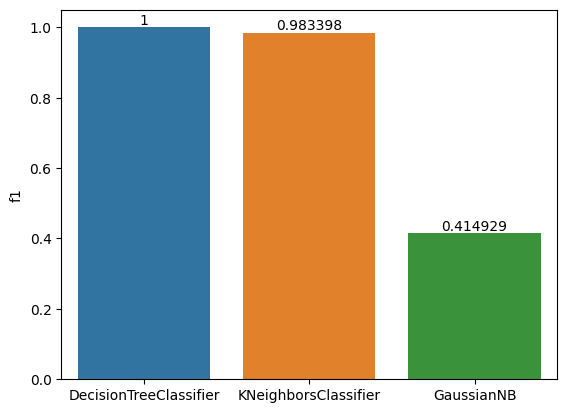

In [ ]:
ax =sns.barplot(x=df_model.T.index, y="f1", data=df_model.T)

for i in ax.containers:
    ax.bar_label(i,)

# Feature Selection

## **1- Variance Threshold**

In [ ]:
from sklearn.feature_selection import VarianceThreshold

variances = X.var()
selector = VarianceThreshold(threshold = 0.25)
selector.fit(X_train)
selected_features = X.columns[selector.get_support()]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

list_of_models = [DecisionTreeClassifier(),
                  KNeighborsClassifier(),
                  GaussianNB()]

index = ["accuracy", "precision", "recall", "f1"]

df_model_2 = pd.DataFrame(index=index)


for i in list_of_models:

    model = i

    model.fit(X_train_selected, y_train)

    y_pred = model.predict(X_test_selected)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred, average='micro')
    recall = recall_score(y_test,y_pred, average='micro')
    f1 = f1_score(y_test,y_pred, average='micro')

    print("\tThe Models is " + str(i))
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:  {recall:.4f}")
    print(f"F1_score: {f1:.4f}")
    print("#"*50 +"\n")

    df_model_2[str(i).rstrip("()")]= [accuracy, precision, recall, f1]


df_model_2.T

	The Models is DecisionTreeClassifier()
Accuracy:  1.0000
Precision: 1.0000
Recall:  1.0000
F1_score: 1.0000
##################################################

	The Models is KNeighborsClassifier()
Accuracy:  0.9834
Precision: 0.9834
Recall:  0.9834
F1_score: 0.9834
##################################################

	The Models is GaussianNB()
Accuracy:  0.4149
Precision: 0.4149
Recall:  0.4149
F1_score: 0.4149
##################################################



,accuracy,precision,recall,f1
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
KNeighborsClassifier,0.983398,0.983398,0.983398,0.983398
GaussianNB,0.414929,0.414929,0.414929,0.414929


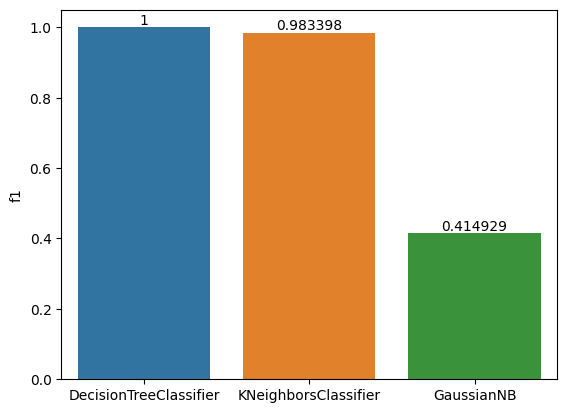

In [ ]:
ax = sns.barplot(x=df_model_2.T.index, y="f1", data=df_model_2.T)

for i in ax.containers:
    ax.bar_label(i,)